## Question
<p> Can we predict the death rate on past registered cases?  
    Is there a time window for when confirming cases to when deaths occure? </p>

In [1]:
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

In [2]:
today_date=datetime.now()
#filename = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".xlsx"
filename ="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx"
df=pd.read_excel(filename)

In [19]:
df_it_1=df.loc[df["GeoId"]=='CN']

In [36]:
df_it_C = df_it_1.sort_values('DateRep')

df_it_C['IT_Total_Cases'] = df_it_C['Cases'].cumsum()

indexNamesIT = df_it_C[ df_it_C['IT_Total_Cases'] == 0 ].index
df_it_C.drop(indexNamesIT, inplace=True)

indexNamesITC = df_it_C[ df_it_C['Cases'] == 0 ].index
df_it_C.drop(indexNamesITC, inplace=True)

df_it_C = df_it_C.reset_index(drop=True)

In [42]:
df_it_C2 = df_it_C
df_it_C2['Cases_5d']= df_it_C2['Cases'].shift(5)
df_it_C2['Cases_6d']= df_it_C2['Cases'].shift(6)
df_it_C2['Cases_7d']= df_it_C2['Cases'].shift(7)
df_it_C2['Cases_8d']= df_it_C2['Cases'].shift(8)
df_it_C2['Cases_9d']= df_it_C2['Cases'].shift(9)
df_it_C2['Cases_10d']= df_it_C2['Cases'].shift(10)
df_it_C2['Cases_11d']= df_it_C2['Cases'].shift(11)
df_it_C2['Cases_12d']= df_it_C2['Cases'].shift(12)
df_it_C2['Cases_13d']= df_it_C2['Cases'].shift(13)
df_it_C2['Cases_14d']= df_it_C2['Cases'].shift(14)
df_it_C2['Cases_15d']= df_it_C2['Cases'].shift(15)
df_it_C2['Cases_16d']= df_it_C2['Cases'].shift(16)
df_it_C2['Cases_17d']= df_it_C2['Cases'].shift(17)
df_it_C3 = df_it_C2.dropna()
df_it_C3 = df_it_C3.reset_index(drop=True)

In [43]:
 from sklearn.linear_model import LinearRegression

lm = LinearRegression()
x0=df_it_C3[['Cases_5d']]
x1=df_it_C3[['Cases_6d']]
x2=df_it_C3[['Cases_7d']]
x3=df_it_C3[['Cases_8d']]
x4=df_it_C3[['Cases_9d']]
x5=df_it_C3[['Cases_10d']]
x6=df_it_C3[['Cases_11d']]
x7=df_it_C3[['Cases_12d']]
x8=df_it_C3[['Cases_13d']]
x9=df_it_C3[['Cases_14d']]
x10=df_it_C3[['Cases_15d']]
x11=df_it_C3[['Cases_16d']]
x12=df_it_C3[['Cases_17d']]
y=df_it_C3['Deaths']

lm.fit(x0, y)
print ("5d: ",lm.score(x0, y))
lm.fit(x1, y)
print ("6d: ",lm.score(x1, y))
lm.fit(x2, y)
print ("7d: ",lm.score(x2, y))
lm.fit(x3, y)
print ("8d: ",lm.score(x3, y))
lm.fit(x4, y)
print ("9d: ",lm.score(x4, y))
lm.fit(x5, y)
print ("10d: ",lm.score(x5, y))
lm.fit(x6, y)
print ("11d: ",lm.score(x6, y))
lm.fit(x7, y)
print ("12d: ",lm.score(x7, y))
lm.fit(x8, y)
print ("13d: ",lm.score(x8, y))
lm.fit(x9, y)
print ("14d: ",lm.score(x9, y))
lm.fit(x10, y)
print ("15d: ",lm.score(x10, y))
lm.fit(x11, y)
print ("16d: ",lm.score(x11, y))
lm.fit(x12, y)
print ("17d: ",lm.score(x12, y))


5d:  0.28793923787344566
6d:  0.37141737049357726
7d:  0.3324238749949405
8d:  0.33438420852449124
9d:  0.2914016536658576
10d:  0.270668740825595
11d:  0.3508818260141894
12d:  0.14408638273671615
13d:  0.10455232603005038
14d:  0.06516644709791053
15d:  0.06005044176551654
16d:  0.05273563676419024
17d:  0.01751904631642076


0.6913432509355963
26.906032161360294  intercepts:  [ 0.00661898  0.00477422  0.00845014  0.00061101 -0.00014857]


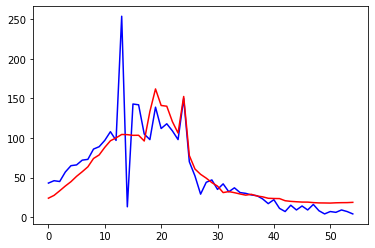

In [47]:
lm = LinearRegression()
x=df_it_C3[['Cases_5d','Cases_6d','Cases_7d','Cases_8d','Cases_9d','Cases_10d','Cases_11d']]
y=df_it_C3['Deaths']

lm.fit(x, y)
Death_hat = lm.predict(x)
print (lm.score(x, y))
print (lm_final.intercept_, " intercepts: ", lm_final.coef_)

x = df_it_C3.index
y = df_it_C3['Deaths']
#x = df_it_C.index
y_hat = Death_hat

uk_plot= plt.plot(x,y, color='blue', label='UK')
it_plot= plt.plot(x,y_hat, color='red', label='IT')

In [49]:
df_uk_1=df.loc[df["GeoId"]=='UK']
df_uk_C = df_uk_1.sort_values('DateRep')

df_uk_C['UK_Total_Cases'] = df_uk_C['Cases'].cumsum()

indexNamesUK = df_uk_C[ df_uk_C['UK_Total_Cases'] == 0 ].index
df_uk_C.drop(indexNamesUK, inplace=True)

indexNamesUKC = df_uk_C[ df_uk_C['Cases'] == 0 ].index
df_uk_C.drop(indexNamesUKC, inplace=True)

df_uk_C = df_uk_C.reset_index(drop=True)

In [50]:
df_uk_C2 = df_uk_C
df_uk_C2['Cases_5d']= df_uk_C2['Cases'].shift(5)
df_uk_C2['Cases_6d']= df_uk_C2['Cases'].shift(6)
df_uk_C2['Cases_7d']= df_uk_C2['Cases'].shift(7)
df_uk_C2['Cases_8d']= df_uk_C2['Cases'].shift(8)
df_uk_C2['Cases_9d']= df_uk_C2['Cases'].shift(9)
df_uk_C2['Cases_10d']= df_uk_C2['Cases'].shift(10)
df_uk_C2['Cases_11d']= df_uk_C2['Cases'].shift(11)
df_uk_C2['Cases_12d']= df_uk_C2['Cases'].shift(12)
df_uk_C2['Cases_13d']= df_uk_C2['Cases'].shift(13)
df_uk_C2['Cases_14d']= df_uk_C2['Cases'].shift(14)
df_uk_C2['Cases_15d']= df_uk_C2['Cases'].shift(15)
df_uk_C2['Cases_16d']= df_uk_C2['Cases'].shift(16)
df_uk_C2['Cases_17d']= df_uk_C2['Cases'].shift(17)
df_uk_C3 = df_uk_C2.dropna()
df_uk_C3 = df_uk_C3.reset_index(drop=True)

In [51]:
lm2 = LinearRegression()
x0=df_uk_C3[['Cases_5d']]
x1=df_uk_C3[['Cases_6d']]
x2=df_uk_C3[['Cases_7d']]
x3=df_uk_C3[['Cases_8d']]
x4=df_uk_C3[['Cases_9d']]
x5=df_uk_C3[['Cases_10d']]
x6=df_uk_C3[['Cases_11d']]
x7=df_uk_C3[['Cases_12d']]
x8=df_uk_C3[['Cases_13d']]
x9=df_uk_C3[['Cases_14d']]
x10=df_uk_C3[['Cases_15d']]
x11=df_uk_C3[['Cases_16d']]
x12=df_uk_C3[['Cases_17d']]
y=df_uk_C3['Deaths']

lm2.fit(x0, y)
print ("5d: ",lm2.score(x0, y))
lm2.fit(x1, y)
print ("6d: ",lm2.score(x1, y))
lm2.fit(x2, y)
print ("7d: ",lm2.score(x2, y))
lm2.fit(x3, y)
print ("8d: ",lm2.score(x3, y))
lm2.fit(x4, y)
print ("9d: ",lm2.score(x4, y))
lm2.fit(x5, y)
print ("10d: ",lm2.score(x5, y))
lm2.fit(x6, y)
print ("11d: ",lm2.score(x6, y))
lm2.fit(x7, y)
print ("12d: ",lm2.score(x7, y))
lm2.fit(x8, y)
print ("13d: ",lm2.score(x8, y))
lm2.fit(x9, y)
print ("14d: ",lm2.score(x9, y))
lm2.fit(x10, y)
print ("15d: ",lm2.score(x10, y))
lm2.fit(x11, y)
print ("16d: ",lm2.score(x11, y))
lm2.fit(x12, y)
print ("17d: ",lm2.score(x12, y))

5d:  0.6831973968706875
6d:  0.7070167998731982
7d:  0.7563942690596797
8d:  0.3909443575801155
9d:  0.5154757488233069
10d:  0.693636552173046
11d:  0.7542264207396898
12d:  0.8517262341904615
13d:  0.8623868349598446
14d:  0.766624587947454
15d:  0.7647022399239013
16d:  0.7343038688395296
17d:  0.7539157470964235


In [52]:
x=df_uk_C3[['Cases_5d','Cases_6d','Cases_7d','Cases_8d','Cases_9d','Cases_10d','Cases_11d']]

In [54]:
Death_hat_uk_cn = lm.predict(x)
print (lm.score(x, y))
lm2.fit(x, y)
Death_hat_uk = lm2.predict(x)
print (lm2.score(x, y))

0.14106983685588104
0.9294904189583706


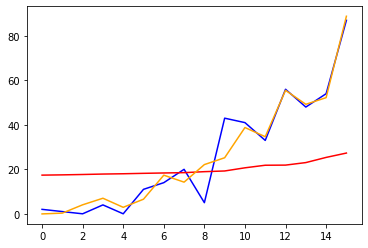

In [55]:
x = df_uk_C3.index
y = df_uk_C3['Deaths']
#x = df_it_C.index
y_hat1 = Death_hat_uk_cn
y_hat2 = Death_hat_uk

plt.plot(x,y, color='blue', label='UK')
plt.plot(x,y_hat1, color='red', label='UK/CN P')
plt.plot(x,y_hat2, color='orange', label='UK P')

In [32]:
df_predict=pd.DataFrame(columns = ['Cases'])
df_predict['Cases']= df_it_C['Cases']
df_predict['Cases_1d']= df_predict['Cases'].shift(-1)
df_predict['Cases_2d']= df_predict['Cases'].shift(-2)
df_predict['Cases_3d']= df_predict['Cases'].shift(-3)
df_predict['Cases_4d']= df_predict['Cases'].shift(-4)
df_predict = df_predict.dropna()

df_predict

,Cases,Cases_1d,Cases_2d,Cases_3d,Cases_4d
0,27,17.0,15.0,4.0,17.0
1,17,15.0,4.0,17.0,136.0
2,15,4.0,17.0,136.0,19.0
3,4,17.0,136.0,19.0,151.0
4,17,136.0,19.0,151.0,140.0
...,...,...,...,...,...
63,110,33.0,75.0,99.0,79.0
64,33,75.0,99.0,79.0,83.0
65,75,99.0,79.0,83.0,150.0
66,99,79.0,83.0,150.0,99.0


In [33]:

x_final=df_predict[['Cases','Cases_1d','Cases_2d','Cases_3d','Cases_4d']]

Death_hat_predict = lm_final.predict(x_final)


In [35]:
df_predict['Predict']= Death_hat_predict
df_predict['Deaths']= df_it_C['Deaths'].shift(-14)
df_predict.tail(20)

,Cases,Cases_1d,Cases_2d,Cases_3d,Cases_4d,Predict,Deaths
48,205,127.0,119.0,117.0,170.0,29.921048,14.0
49,127,119.0,117.0,170.0,101.0,29.392308,9.0
50,119,117.0,170.0,101.0,46.0,29.743677,16.0
51,117,170.0,101.0,46.0,45.0,29.366956,8.0
52,170,101.0,46.0,45.0,20.0,28.926686,4.0
53,101,46.0,45.0,20.0,29.0,28.182331,7.0
54,46,45.0,20.0,29.0,24.0,27.608502,6.0
55,45,20.0,29.0,24.0,22.0,27.555821,9.0
56,20,29.0,24.0,22.0,19.0,27.390287,7.0
57,29,24.0,22.0,19.0,22.0,27.406808,4.0
